In [1]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# These lines of code are setting various parameters for the appearance of plots created using the matplotlib library. 
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size = 20)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['figure.figsize'] = (30.0, 8.0)   #13,8   # Determina o tamanho do plot dentro do ipython notebook
plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1
plt.rcParams['xtick.major.pad']= 8

In [3]:
tracer = 'LRG'
region = 'NScomb' # choices=['NGC', 'SGC', 'NS', 'S', 'NGCS', 'SGCS', 'N']
theory_name = 'fs'
clustering_statistics = 'pk' # choices=['pk', 'xi']
zmin, zmax, b0 = {'LRG': (0.4, 1.1, 1.7), 'ELG': (1.1, 1.6, 0.84), 'QSO': (1.6, 2.1, 1.2)}[tracer]

In [4]:
base_dir = '..'
profiles_fn = sorted(glob.glob(os.path.join(base_dir, 'blinded', 'test_w0-*', '{}'.format(theory_name), '{}'.format(clustering_statistics), 'profile_{}_{}_{}_{}.npy'.format(tracer, region, zmin, zmax))))
profiles_unblinded_fn = os.path.join(base_dir, 'unblinded', '{}'.format(theory_name), '{}'.format(clustering_statistics),'profile_{}_{}_{}_{}.npy'.format(tracer, region, zmin, zmax))

In [5]:
profiles_fn

['../blinded/test_w0-0.9040043101843285_wa0.025634205416364297/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-0.9057030601797708_wa-0.6831142329608426/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-0.970439944958287_wa-0.507777992481059/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-0.996229742129104_wa0.28930866494014884/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.0485430984101343_wa0.14015686872763022/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.106392086529483_wa0.45478607672455995/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.1616966626392298_wa0.3746115553255438/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.233469858595847_wa0.7658531629974685/fs/pk/profile_LRG_NScomb_0.4_1.1.npy']

In [6]:
from desilike.samples import Profiles

In [7]:
bestfit = {name: [] for name in ['qpar', 'qper', 'dm', 'df', 'chi2min']}
error = {name: [] for name in ['qpar', 'qper', 'dm', 'df']}
expected = {name: [] for name in ['qpar', 'qper', 'dm', 'df']}
expected_unblided = {}

from desilike.samples import Profiles
profiles_unblinded = Profiles.load(profiles_unblinded_fn)
index = profiles_unblinded.bestfit.logposterior.argmax()

bestfit_unblinded = {name: profiles_unblinded.bestfit[name][index] for name in error}
bestfit_unblinded['qiso'] = bestfit_unblinded['qpar']**(1./3.) * bestfit_unblinded['qper']**(2./3.)
bestfit_unblinded['chi2min'] = profiles_unblinded.bestfit.chi2min
# bestfit_unblinded['chi2min_red'] = float(profiles.bestfit.chi2min / profiles.bestfit.attrs['ndof'])
error_unblinded = {name: profiles_unblinded.error[name][index] for name in error}
for name in error_unblinded: error_unblinded[name] = error_unblinded[name]
                   
expected_unblided['qpar'] = profiles_unblinded.attrs['expected']['qpar']
expected_unblided['qper'] = profiles_unblinded.attrs['expected']['qper']
expected_unblided['dm'] = profiles_unblinded.attrs['expected']['dm']
expected_unblided['df'] = profiles_unblinded.attrs['expected']['df']

cov_unblinded = profiles_unblinded.covariance.view(params=['qper', 'qpar'])
jac = np.array([2.0 / 3.0, 1.0 / 3.0])
qiso_error_unblinded = {'qiso': jac.dot(cov_unblinded).dot(jac)**0.5}

qiso_error, qiso_error_fixed_covmat_unblinded = [], []

for profiles_fn_ in profiles_fn:
    profiles = Profiles.load(profiles_fn_)
    for name in expected: expected[name].append(profiles.attrs['expected'][name])
    index = profiles.bestfit.logposterior.argmax()
    for name in error: bestfit[name].append(profiles.bestfit[name][index])
    for name in error: error[name].append(profiles.error[name][index])
    cov = profiles.covariance.view(params=['qper', 'qpar'])
    jac = np.array([2.0 / 3.0, 1.0 / 3.0])
    qiso_error.append(jac.dot(cov).dot(jac)**0.5)    
    bestfit['chi2min'].append(float(profiles.bestfit.chi2min))

bestfit['qiso'] = [*(np.array(bestfit['qpar'])**(1./3.) * np.array(bestfit['qper'])**(2./3.))]
expected['qiso'] = [*(np.array(expected['qpar'])**(1./3.) * np.array(expected['qper'])**(2./3.))]
error['qiso'] = qiso_error

error_unblinded['qiso'] = qiso_error_unblinded['qiso']

In [8]:
error_unblinded

{'qpar': 0.017725916029996402,
 'qper': 0.01197342582296762,
 'dm': 0.02679133108192011,
 'df': 0.048309361870519485,
 'qiso': 0.00868577945938632}

In [9]:
profiles_fn

['../blinded/test_w0-0.9040043101843285_wa0.025634205416364297/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-0.9057030601797708_wa-0.6831142329608426/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-0.970439944958287_wa-0.507777992481059/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-0.996229742129104_wa0.28930866494014884/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.0485430984101343_wa0.14015686872763022/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.106392086529483_wa0.45478607672455995/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.1616966626392298_wa0.3746115553255438/fs/pk/profile_LRG_NScomb_0.4_1.1.npy',
 '../blinded/test_w0-1.233469858595847_wa0.7658531629974685/fs/pk/profile_LRG_NScomb_0.4_1.1.npy']

In [10]:
print(profiles.bestfit.attrs)
print(profiles.bestfit)

{'size': 108, 'nvaried': 13, 'ndof': 95}
ParameterBestFit(shape=(3,), params=ParameterCollection(['qpar', 'qper', 'dm', 'df', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4', 'logposterior', 'f_sqrt_Ap', 'm', 'n', 'loglikelihood', 'logprior']))


In [11]:
bestfit

{'qpar': [1.0210481451770472,
  0.9930917747409093,
  0.9869494263033585,
  1.0157665625738812,
  0.9955647659770814,
  0.9955432641511709,
  0.986980361479716,
  0.993875350235136],
 'qper': [1.016671946526991,
  0.9919660357020453,
  0.9818853239372377,
  1.0059416774830858,
  0.9900276321311122,
  0.9902574766120565,
  0.9737470106374962,
  0.9687934672618788],
 'dm': [-0.003899390415809476,
  0.0030408188114160175,
  0.011194224864238125,
  0.007441648491063718,
  0.000981696941243517,
  -0.0009632295642024026,
  0.01476465838152458,
  0.007846216975533608],
 'df': [1.059949429019277,
  0.8567453270000923,
  0.8425325966545505,
  1.0402131529808931,
  0.8957777506985943,
  0.9085444122237927,
  0.8484870627273452,
  0.8416950799857303],
 'chi2min': [129.70575159143252,
  134.9756244655865,
  131.9105036032104,
  131.24659365885532,
  121.70801860490751,
  132.71527782169485,
  135.82121700519443,
  135.12658426114396],
 'qiso': [1.0181285913940221,
  0.9923411401875182,
  0.9835704

In [12]:
import pandas as pd

In [13]:
df_error_unblinded = pd.DataFrame(error_unblinded, index=[0])
df_error_unblinded.rename(columns={"qpar": "qpar_err", "qper": "qper_err", "dm": "dm_err", "df": "df_err", "qiso": "qiso_err"}, inplace=True)
df_error_unblinded

,qpar_err,qper_err,dm_err,df_err,qiso_err
0,0.017726,0.011973,0.026791,0.048309,0.008686


In [14]:
df_error = pd.DataFrame(error)
df_error.rename(columns={"qpar": "qpar_err", "qper": "qper_err", "dm": "dm_err", "df": "df_err", "qiso": "qiso_err"}, inplace=True)
df_error

,qpar_err,qper_err,dm_err,df_err,qiso_err
0,0.010914,0.008426,0.013110,0.031901,0.005986
1,0.010452,0.008141,0.011490,0.029231,0.005601
2,0.016608,0.010513,0.024769,0.045713,0.007580
3,0.017818,0.011600,0.025783,0.048631,0.008591
4,0.017710,0.013015,0.026386,0.049374,0.009171
5,0.017387,0.011844,0.025343,0.048266,0.008542
6,0.010359,0.007990,0.011346,0.029141,0.005513
7,0.017583,0.011742,0.026013,0.048590,0.008452


In [15]:
bestfit

{'qpar': [1.0210481451770472,
  0.9930917747409093,
  0.9869494263033585,
  1.0157665625738812,
  0.9955647659770814,
  0.9955432641511709,
  0.986980361479716,
  0.993875350235136],
 'qper': [1.016671946526991,
  0.9919660357020453,
  0.9818853239372377,
  1.0059416774830858,
  0.9900276321311122,
  0.9902574766120565,
  0.9737470106374962,
  0.9687934672618788],
 'dm': [-0.003899390415809476,
  0.0030408188114160175,
  0.011194224864238125,
  0.007441648491063718,
  0.000981696941243517,
  -0.0009632295642024026,
  0.01476465838152458,
  0.007846216975533608],
 'df': [1.059949429019277,
  0.8567453270000923,
  0.8425325966545505,
  1.0402131529808931,
  0.8957777506985943,
  0.9085444122237927,
  0.8484870627273452,
  0.8416950799857303],
 'chi2min': [129.70575159143252,
  134.9756244655865,
  131.9105036032104,
  131.24659365885532,
  121.70801860490751,
  132.71527782169485,
  135.82121700519443,
  135.12658426114396],
 'qiso': [1.0181285913940221,
  0.9923411401875182,
  0.9835704

In [16]:
bestfit_unblinded

{'qpar': 0.9978237766312253,
 'qper': 0.993913911171625,
 'dm': 0.007657006761500892,
 'df': 0.9397596241916434,
 'qiso': 0.9952154944214672,
 'chi2min': ParameterArray(logposterior, None, 130.68605023825384)}

In [17]:
profiles_unblinded.bestfit.attrs['ndof']

95

In [18]:
unblinded_cosmo = {'w0': -1.0, 'wa': 0.0, 'f': 0.8}
unblinded_cosmo.update(bestfit_unblinded)
unblinded_cosmo.update({'ndof': profiles_unblinded.bestfit.attrs['ndof']})
unblinded_cosmo

{'w0': -1.0,
 'wa': 0.0,
 'f': 0.8,
 'qpar': 0.9978237766312253,
 'qper': 0.993913911171625,
 'dm': 0.007657006761500892,
 'df': 0.9397596241916434,
 'qiso': 0.9952154944214672,
 'chi2min': ParameterArray(logposterior, None, 130.68605023825384),
 'ndof': 95}

In [19]:
cosmo_unblinded = pd.DataFrame(unblinded_cosmo, index=[0])
cosmo_unblinded = pd.concat([cosmo_unblinded, df_error_unblinded], axis=1)
cosmo_unblinded

,w0,wa,f,qpar,qper,dm,df,qiso,chi2min,ndof,qpar_err,qper_err,dm_err,df_err,qiso_err
0,-1.0,0.0,0.8,0.997824,0.993914,0.007657,0.93976,0.995215,130.68605,95,0.017726,0.011973,0.026791,0.048309,0.008686


In [20]:
base = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/'
data_dir = base + 'blinded/jmena/test_w0-*/LSScats/blinded/'
fn_list = sorted(glob.glob(os.path.join(data_dir, 'blinded_parameters_{}.csv'.format(tracer))))

cosmo_blinded = {name: [] for name in ['w0', 'wa', 'f']}
ndof = {name: [] for name in ['ndof']}
for j, profiles_fn_ in zip(fn_list, profiles_fn):
    w0_blind, wa_blind, f_blind = np.loadtxt(j, delimiter=',', skiprows=1)
    cosmo_blinded['w0'].append(w0_blind)
    cosmo_blinded['wa'].append(wa_blind)
    cosmo_blinded['f'].append(f_blind)
    ndof['ndof'].append(profiles.bestfit.attrs['ndof'])

cosmo_blinded.update(bestfit)
cosmo_blinded.update(df_error)
cosmo_blinded.update(ndof)
cosmo_blinded = pd.DataFrame(cosmo_blinded)

blinded_concat = pd.concat([cosmo_unblinded, cosmo_blinded ], axis=0)

In [21]:
cosmo_unblinded

,w0,wa,f,qpar,qper,dm,df,qiso,chi2min,ndof,qpar_err,qper_err,dm_err,df_err,qiso_err
0,-1.0,0.0,0.8,0.997824,0.993914,0.007657,0.93976,0.995215,130.68605,95,0.017726,0.011973,0.026791,0.048309,0.008686


In [22]:
blinded_concat

,w0,wa,f,qpar,qper,dm,df,qiso,chi2min,ndof,qpar_err,qper_err,dm_err,df_err,qiso_err
0,-1.000000,0.000000,0.800000,0.997824,0.993914,0.007657,0.939760,0.995215,130.686050,95,0.017726,0.011973,0.026791,0.048309,0.008686
0,-0.904004,0.025634,0.880000,1.021048,1.016672,-0.003899,1.059949,1.018129,129.705752,95,0.010914,0.008426,0.013110,0.031901,0.005986
1,-0.905703,-0.683114,0.733309,0.993092,0.991966,0.003041,0.856745,0.992341,134.975624,95,0.010452,0.008141,0.011490,0.029231,0.005601
2,-0.970440,-0.507778,0.720000,0.986949,0.981885,0.011194,0.842533,0.983570,131.910504,95,0.016608,0.010513,0.024769,0.045713,0.007580
3,-0.996230,0.289309,0.880000,1.015767,1.005942,0.007442,1.040213,1.009206,131.246594,95,0.017818,0.011600,0.025783,0.048631,0.008591
4,-1.048543,0.140157,0.759545,0.995565,0.990028,0.000982,0.895778,0.991870,121.708019,95,0.017710,0.013015,0.026386,0.049374,0.009171
5,-1.106392,0.454786,0.764499,0.995543,0.990257,-0.000963,0.908544,0.992016,132.715278,95,0.017387,0.011844,0.025343,0.048266,0.008542
6,-1.161697,0.374612,0.720000,0.986980,0.973747,0.014765,0.848487,0.978138,135.821217,95,0.010359,0.007990,0.011346,0.029141,0.005513
7,-1.233470,0.765853,0.720000,0.993875,0.968793,0.007846,0.841695,0.977083,135.126584,95,0.017583,0.011742,0.026013,0.048590,0.008452


In [23]:
df = pd.DataFrame(blinded_concat)
df = df[["w0", "wa", "f", "qpar", "qpar_err", "qper", "qper_err", "qiso", "qiso_err", "dm", "dm_err", "df", "df_err", "chi2min", "ndof"]]

print(df.to_latex(index=False,
                  formatters={"name": str.upper},
                float_format="{:0.4f}".format, multirow = False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     w0 &      wa &      f &   qpar &  qpar\_err &   qper &  qper\_err &   qiso &  qiso\_err &      dm &  dm\_err &     df &  df\_err &  chi2min &  ndof \\
\midrule
-1.0000 &  0.0000 & 0.8000 & 0.9978 &    0.0177 & 0.9939 &    0.0120 & 0.9952 &    0.0087 &  0.0077 &  0.0268 & 0.9398 &  0.0483 & 130.6861 &    95 \\
-0.9040 &  0.0256 & 0.8800 & 1.0210 &    0.0109 & 1.0167 &    0.0084 & 1.0181 &    0.0060 & -0.0039 &  0.0131 & 1.0599 &  0.0319 & 129.7058 &    95 \\
-0.9057 & -0.6831 & 0.7333 & 0.9931 &    0.0105 & 0.9920 &    0.0081 & 0.9923 &    0.0056 &  0.0030 &  0.0115 & 0.8567 &  0.0292 & 134.9756 &    95 \\
-0.9704 & -0.5078 & 0.7200 & 0.9869 &    0.0166 & 0.9819 &    0.0105 & 0.9836 &    0.0076 &  0.0112 &  0.0248 & 0.8425 &  0.0457 & 131.9105 &    95 \\
-0.9962 &  0.2893 & 0.8800 & 1.0158 &    0.0178 & 1.0059 &    0.0116 & 1.0092 &    0.0086 &  0.0074 &  0.0258 & 1.0402 &  0.0486 & 131.2466 &    95 \\
-1.0485 &  0.1402 & 0.7595 & 0.9956 & 

/tmp/ipykernel_210559/1616399567.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False,


In [24]:
expected_unblided

{'qpar': 1.0, 'qper': 1.0, 'dm': 1.0, 'df': 1.0}

In [25]:
print(r'qiso_unlinded = {:.5} \pm {:.5}'.format(bestfit_unblinded['qiso'], qiso_error_unblinded['qiso'] ))

qiso_unlinded = 0.99522 \pm 0.0086858


In [26]:
bestfit_unblinded['chi2min']

ParameterArray(logposterior, None, 130.68605023825384)

In [27]:
# bestfit_unblinded['chi2min_red']

In [28]:
bestfit['chi2min']

[129.70575159143252,
 134.9756244655865,
 131.9105036032104,
 131.24659365885532,
 121.70801860490751,
 132.71527782169485,
 135.82121700519443,
 135.12658426114396]

In [29]:
 bestfit_unblinded['chi2min']

ParameterArray(logposterior, None, 130.68605023825384)

In [30]:
bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.

ParameterArray(logposterior, None, [-0.00750117  0.03282351  0.00936943  0.00428924 -0.06869923  0.0155275
  0.03929392  0.03397864])

In [31]:
profiles.bestfit.chi2min

ParameterArray(logposterior, None, 135.12658426114396)

In [32]:
profiles.bestfit.attrs

{'size': 108, 'nvaried': 13, 'ndof': 95}

In [33]:
bestfit_unblinded

{'qpar': 0.9978237766312253,
 'qper': 0.993913911171625,
 'dm': 0.007657006761500892,
 'df': 0.9397596241916434,
 'qiso': 0.9952154944214672,
 'chi2min': ParameterArray(logposterior, None, 130.68605023825384)}

In [34]:
expected['dm'] = list(np.zeros(len(expected['dm'])))
expected['dm']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [35]:
error['dm']

[0.013110323741564327,
 0.011490282984094616,
 0.024768935877912804,
 0.025782597636173177,
 0.026385681357349852,
 0.02534292796536522,
 0.011346479144346427,
 0.026013026568602646]

In [36]:
bestfit['dm']

[-0.003899390415809476,
 0.0030408188114160175,
 0.011194224864238125,
 0.007441648491063718,
 0.000981696941243517,
 -0.0009632295642024026,
 0.01476465838152458,
 0.007846216975533608]

In [37]:
bestfit_unblinded['dm']

0.007657006761500892

In [38]:

bestfit['dm'] - bestfit_unblinded['dm']

array([-0.0115564 , -0.00461619,  0.00353722, -0.00021536, -0.00667531,
       -0.00862024,  0.00710765,  0.00018921])

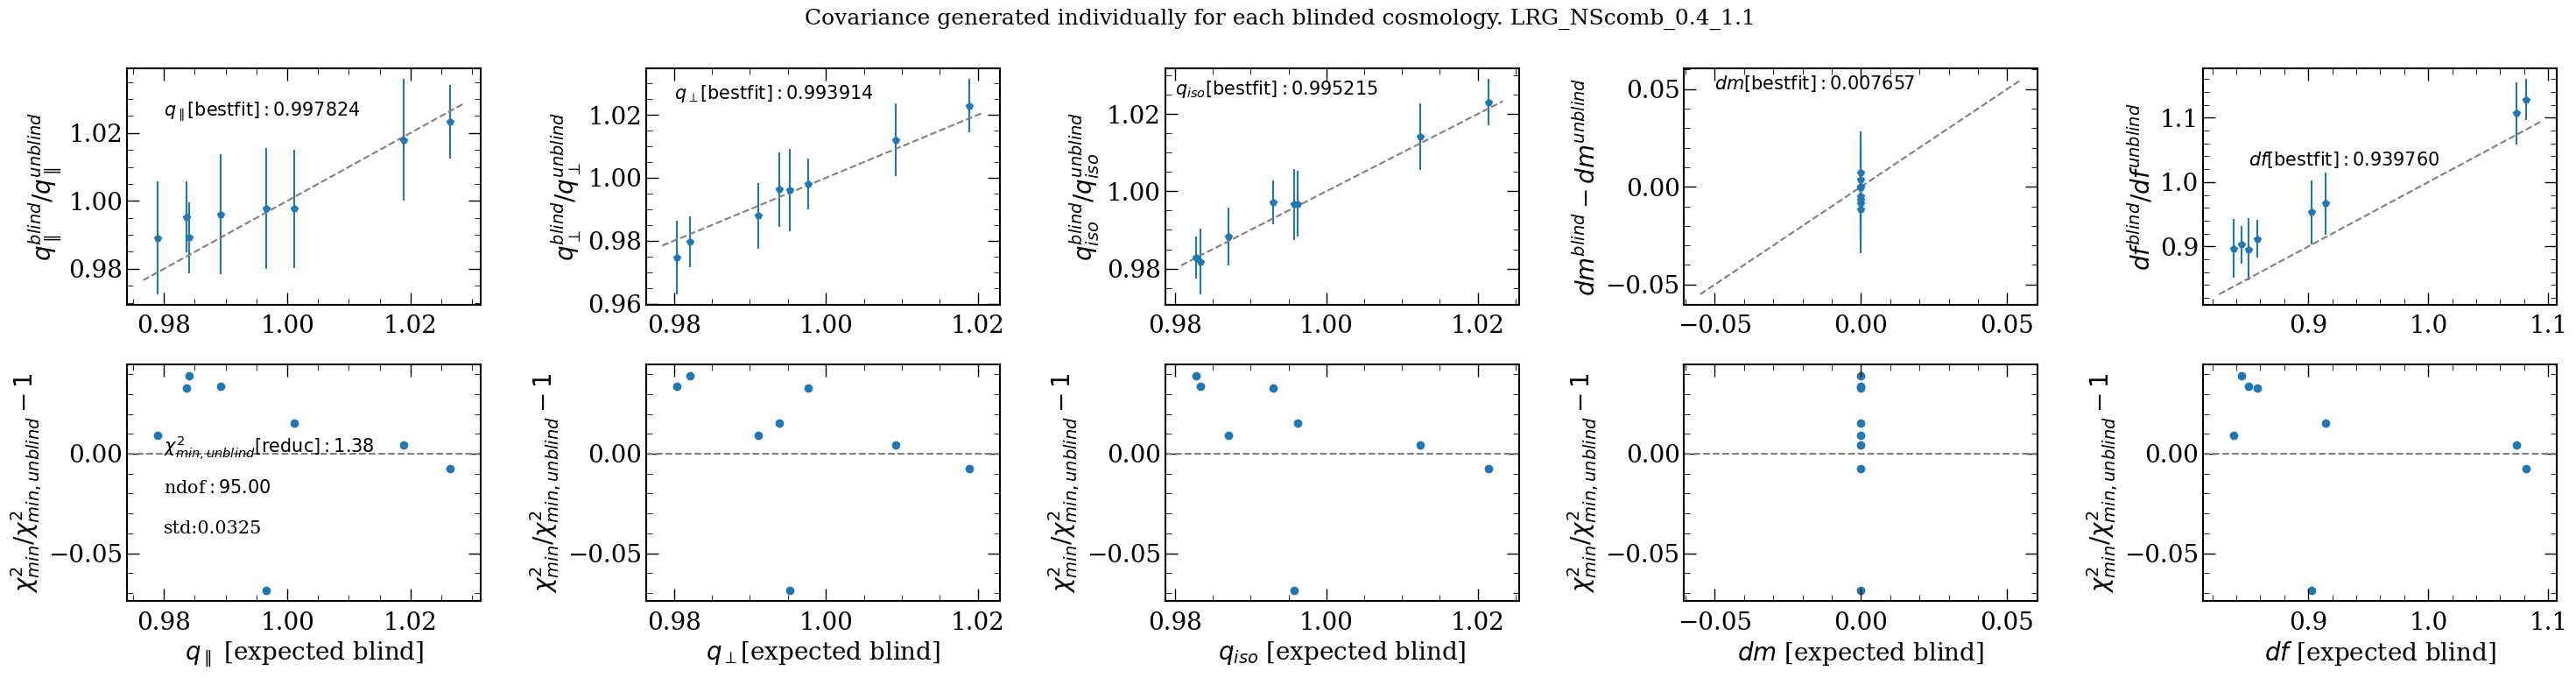

In [39]:
fig, ax = plt.subplots(2, 5, sharex='col')

ax[0, 0].errorbar(expected['qpar'], bestfit['qpar'] / bestfit_unblinded['qpar'], yerr=error['qpar'], fmt='p') #row=0, col=0
ax[0, 0].tick_params('x', labelbottom=True)
ax[0, 0].set(ylabel=r'$q_{\parallel}^{blind} / q_{\parallel}^{unblind}$')
ax[0, 0].plot(ax[0, 0].get_xlim(), ax[0, 0].get_xlim(), c='gray', linestyle='--')
ax[0, 0].text(0.98, 1.025, r'$q_{\parallel}{\rm[bestfit]}: %f$' % (bestfit_unblinded['qpar']), fontsize=15)

ax[1, 0].scatter(expected['qpar'], bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.) #row=1, col=0
ax[1, 0].set(ylabel=r'$\chi^2_{min} / \chi^2_{min, unblind} - 1$', xlabel=r'$q_{\parallel}$ [expected blind]')
ax[1, 0].axhline(y=0., color='gray', linestyle='--')
chi2min_red = profiles_unblinded.bestfit.chi2min / profiles_unblinded.bestfit.attrs['ndof']
if clustering_statistics == 'pk':
    ax[1, 0].text(0.98, 0., r'$\chi^2_{min, unblind}{\rm[reduc]}: %.2f$' % (chi2min_red), fontsize=15)
    chi2min_std = np.array(bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.).std()
    ax[1, 0].text(0.98, -0.04, r'std:{:.3}'.format(chi2min_std), fontsize=15)
    ax[1, 0].text(0.98, -0.02, r'ndof$: %.2f$' % (profiles_unblinded.bestfit.attrs['ndof']), fontsize=15)
else:
    ax[1, 0].text(0.98, 0.2, r'$\chi^2_{min, unblind}{\rm[reduc]}: %.2f$' % (chi2min_red), fontsize=15)
    chi2min_std = np.array(bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.).std()
    ax[1, 0].text(0.98, 0.1, r'std:{:.3}'.format(chi2min_std), fontsize=15)
    ax[1, 0].text(0.98, 0.15, r'ndof$: %.2f$' % (profiles_unblinded.bestfit.attrs['ndof']), fontsize=15)


ax[0, 1].errorbar(expected['qper'], bestfit['qper'] / bestfit_unblinded['qper'], yerr=error['qper'], fmt='p') #row=0, col=1
ax[0, 1].tick_params('x', labelbottom=True)
ax[0, 1].set( ylabel=r'$q_{\perp}^{blind} / q_{\perp}^{unblind}$')
ax[0, 1].plot(ax[0, 1].get_xlim(), ax[0, 1].get_xlim(), c='gray', linestyle='--')
ax[0, 1].text(0.98, 1.025, r'$q_{\perp}{\rm[bestfit]}: %f$' % (bestfit_unblinded['qper']), fontsize=15)

ax[1, 1].scatter(expected['qper'], bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.) #row=1, col=1
ax[1, 1].set(ylabel=r'$\chi^2_{min} / \chi^2_{min, unblind} - 1$', xlabel=r'$q_{\perp}$[expected blind]')
ax[1, 1].axhline(y=0., color='gray', linestyle='--')

ax[0, 2].errorbar(expected['qiso'], bestfit['qiso'] / bestfit_unblinded['qiso'], yerr=error['qiso'], fmt='p') #row=0, col=0
ax[0, 2].tick_params('x', labelbottom=True)
ax[0, 2].set(ylabel=r'$q_{iso}^{blind} / q_{iso}^{unblind}$')
ax[0, 2].plot(ax[0, 2].get_xlim(), ax[0, 2].get_xlim(), c='gray', linestyle='--')
ax[0, 2].text(0.98, 1.025, r'$q_{iso}{\rm[bestfit]}: %f$' % (bestfit_unblinded['qiso']), fontsize=15)

ax[1, 2].scatter(expected['qiso'], bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.) #row=1, col=0
ax[1, 2].set(ylabel=r'$\chi^2_{min} / \chi^2_{min, unblind} - 1$', xlabel=r'$q_{iso}$ [expected blind]')
ax[1, 2].axhline(y=0., color='gray', linestyle='--')

ax[0, 3].errorbar(expected['dm'], bestfit['dm'] - bestfit_unblinded['dm'], yerr=error['dm'], fmt='p') #row=0, col=0
ax[0, 3].tick_params('x', labelbottom=True)
ax[0, 3].set(ylabel=r'$dm^{blind} - dm^{unblind}$')
ax[0, 3].plot(ax[0, 3].get_xlim(), ax[0, 3].get_xlim(), c='gray', linestyle='--')
ax[0, 3].text(-0.05, 0.05, r'$dm{\rm[bestfit]}: %f$' % (bestfit_unblinded['dm']), fontsize=15)

ax[1, 3].scatter(expected['dm'], bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.) #row=1, col=0
ax[1, 3].set(ylabel=r'$\chi^2_{min} / \chi^2_{min, unblind} - 1$', xlabel=r'$dm$ [expected blind]')
ax[1, 3].axhline(y=0., color='gray', linestyle='--')

ax[0, 4].errorbar(expected['df'], bestfit['df'] / bestfit_unblinded['df'], yerr=error['df'], fmt='p') #row=0, col=0
ax[0, 4].tick_params('x', labelbottom=True)
ax[0, 4].set(ylabel=r'$df^{blind} / df^{unblind}$')
ax[0, 4].plot(ax[0, 4].get_xlim(), ax[0, 4].get_xlim(), c='gray', linestyle='--')
ax[0, 4].text(0.85, 1.025, r'$df{\rm[bestfit]}: %f$' % (bestfit_unblinded['df']), fontsize=15)

ax[1, 4].scatter(expected['df'], bestfit['chi2min'] / bestfit_unblinded['chi2min'] - 1.) #row=1, col=0
ax[1, 4].set(ylabel=r'$\chi^2_{min} / \chi^2_{min, unblind} - 1$', xlabel=r'$df$ [expected blind]')
ax[1, 4].axhline(y=0., color='gray', linestyle='--')

if clustering_statistics == 'pk':
    fig.suptitle('Covariance generated individually for each blinded cosmology. {}_{}_{}_{}'.format(tracer, region, zmin, zmax), fontsize=18)
else:
    fig.suptitle('Same covariance generated with unblinded cosmology. {}_{}_{}_{}'.format(tracer, region, zmin, zmax), fontsize=18)
plt.tight_layout()
# plt.savefig(os.path.join(base_dir, 'blinded', '{}_one2one_plot_{}_{}_{}_{}.png'.format(clustering_statistics, tracer, region, zmin, zmax)))
plt.show()